In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

In [2]:
def decibel(A): return 20*np.log(A)

# low pass filter

In [3]:
r1, r2 = 1002, 9850
Vi = 1.56
C = 102.2e-9
f = np.array([2.5, 4, 8.7, 9.9, 13.55, 25, 36, 43.5, 56, 74, 93, 111.5, 127, 145, 153, 158, 176, 186, 196, 215, 228, 260, 300, 355, 375, 415, 465, 500, 550, 620, 695, 805, 980, 1325, 1620, 2000, 2550, 5050, 8000, 14900, 30750, 80000, 307500, 515000, 1000000, 3000000])
Vo = np.array([15.4, 15.4, 15.2, 15.2, 15.2, 15, 14.6, 14.2, 14.2, 13.8, 13.2, 12.5, 11.9, 11.4, 11, 10.8, 10.4, 10, 9.6, 9.1, 8.6, 7.8, 7.2, 6.08, 5.76, 5.28, 5, 4.6, 4.2, 4, 3.6, 3, 2.6, 2, 1.56, 1.24, 1, 0.52, 0.36, 0.18, 0.108, 0.072, 0.06, 0.05, 0.05, 0.05])

In [26]:
gain_dB = decibel(Vo/Vi)
max_gain_th = decibel(r2/r1)
max_gain_exp = np.max(gain_dB)
fc = 1/(2*np.pi*r2*C)
print('fc:', fc)
print('gain error:', (max_gain_th-max_gain_exp)*100/max_gain_th)

fc: 158.1004133349512
gain error: -0.18412970984943522


Text(2, 0, '$\\longleftarrow$Pass Band$\\longrightarrow$')

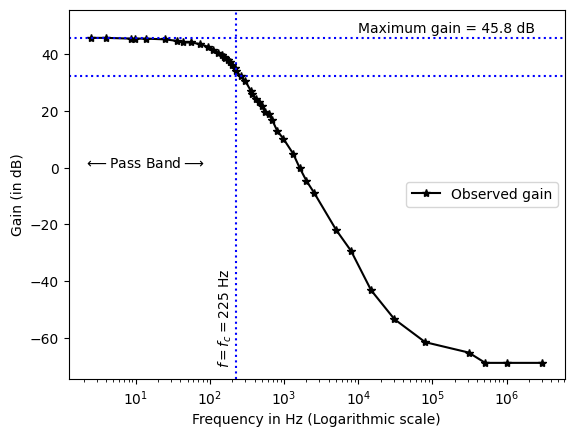

In [20]:
plt.plot(f, gain_dB, '-k*', label='Observed gain')
plt.xscale('log')

fc_exp = 225 # manually changed

plt.axhline(y=max_gain_exp, color='b', linestyle=':')
plt.axhline(y=max_gain_exp/np.sqrt(2), color='b', linestyle=':')
plt.axvline(x=fc_exp, color='b', linestyle=':')

# gain_near_fc = np.max(gain_dB[(np.abs(f - fc)).argmin()])
# plt.vlines(x=fc, ymin = np.min(gain_dB)-20, ymax = gain_near_fc, color='k')

plt.xlabel('Frequency in Hz (Logarithmic scale)')
plt.ylabel('Gain (in dB)')
plt.legend(loc='right')

plt.gca().set_ylim(top=max_gain_exp+10)

plt.text(10000, max_gain_exp+2, f'Maximum gain = {np.round(max_gain_exp, 1)} dB')
plt.text(fc_exp-100, np.min(gain_dB), f'$f = f_c = ${np.round(fc_exp)} Hz', rotation=90)
plt.text(2, 0, r"$\longleftarrow$Pass Band$\longrightarrow$")

In [27]:
f_str = [str(x)+' Hz' for x in list(f)]
table_1 = np.array([f_str, Vo, np.round(Vo/Vi, 2), np.round(gain_dB, 2)]).transpose()
print(tabulate(table_1, tablefmt="latex"))

\begin{tabular}{lrrr}
\hline
 2.5 Hz       & 15.4   & 9.87 &  45.79 \\
 4.0 Hz       & 15.4   & 9.87 &  45.79 \\
 8.7 Hz       & 15.2   & 9.74 &  45.53 \\
 9.9 Hz       & 15.2   & 9.74 &  45.53 \\
 13.55 Hz     & 15.2   & 9.74 &  45.53 \\
 25.0 Hz      & 15     & 9.62 &  45.27 \\
 36.0 Hz      & 14.6   & 9.36 &  44.73 \\
 43.5 Hz      & 14.2   & 9.1  &  44.17 \\
 56.0 Hz      & 14.2   & 9.1  &  44.17 \\
 74.0 Hz      & 13.8   & 8.85 &  43.6  \\
 93.0 Hz      & 13.2   & 8.46 &  42.71 \\
 111.5 Hz     & 12.5   & 8.01 &  41.62 \\
 127.0 Hz     & 11.9   & 7.63 &  40.64 \\
 145.0 Hz     & 11.4   & 7.31 &  39.78 \\
 153.0 Hz     & 11     & 7.05 &  39.06 \\
 158.0 Hz     & 10.8   & 6.92 &  38.7  \\
 176.0 Hz     & 10.4   & 6.67 &  37.94 \\
 186.0 Hz     & 10     & 6.41 &  37.16 \\
 196.0 Hz     &  9.6   & 6.15 &  36.34 \\
 215.0 Hz     &  9.1   & 5.83 &  35.27 \\
 228.0 Hz     &  8.6   & 5.51 &  34.14 \\
 260.0 Hz     &  7.8   & 5    &  32.19 \\
 300.0 Hz     &  7.2   & 4.62 &  30.59 \\
 355.

# high pass filter

In [28]:
r1_, r2_ = 1002, 9850
Vi_ = 0.5
C_ = 102.2e-9
f_ = np.array([25, 67, 90, 120, 135, 160, 182, 204, 230, 306, 410, 690, 895, 1315, 1410, 1585, 2060, 2540, 3075, 5000, 6850, 9000, 15000, 30000])
Vo_ = np.array([0.144, 0.272, 0.336, 0.425, 0.496, 0.544, 0.616, 0.680, 0.760, 0.980, 1.26, 1.96, 2.44, 3.08, 3.20, 3.40, 3.8, 4, 4.28, 4.52, 4.64, 4.68, 4.68, 4.68])

In [29]:
gain_dB_ = decibel(Vo_/Vi_)
max_gain_th_ = decibel(r2_/r1_)
max_gain_exp_ = np.max(gain_dB_)
fc_ = 1/(2*np.pi*r1_*C_)
print('fc:', fc_)
print('gain error:', (max_gain_th_-max_gain_exp_)*100/max_gain_th_)

fc: 1554.1807099294108
gain error: 2.145208117720039


Text(2500, 0, '$\\longleftarrow$Pass Band$\\longrightarrow$')

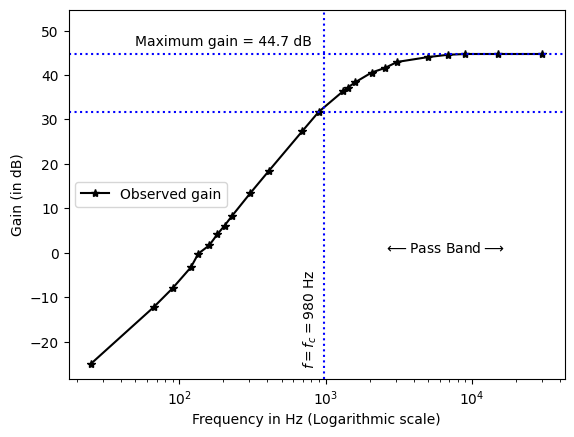

In [48]:
plt.plot(f_, gain_dB_, '-k*', label='Observed gain')
plt.xscale('log')

fc_exp_ = 980 # manually changed

plt.axhline(y=max_gain_exp_, color='b', linestyle=':')
plt.axhline(y=max_gain_exp_/np.sqrt(2), color='b', linestyle=':')
plt.axvline(x=fc_exp_, color='b', linestyle=':')

plt.xlabel('Frequency in Hz (Logarithmic scale)')
plt.ylabel('Gain (in dB)')
plt.legend(loc='center left')

plt.gca().set_ylim(top=max_gain_exp_+10)

plt.text(50, max_gain_exp_+2, f'Maximum gain = {np.round(max_gain_exp_, 1)} dB')
plt.text(fc_exp_-300, np.min(gain_dB_), f'$f = f_c = ${np.round(fc_exp_)} Hz', rotation=90)
plt.text(2500, 0, r"$\longleftarrow$Pass Band$\longrightarrow$")

In [28]:
f_str_ = [str(x)+' Hz' for x in list(f_)]
table_2 = np.array([f_str_, Vo_, np.round(Vo_/Vi_, 2), np.round(gain_dB_, 2)]).transpose()
print(tabulate(table_2, tablefmt="latex"))

\begin{tabular}{lrrr}
\hline
 25 Hz    & 0.144 & 0.29 & -24.9  \\
 67 Hz    & 0.272 & 0.54 & -12.18 \\
 90 Hz    & 0.336 & 0.67 &  -7.95 \\
 120 Hz   & 0.425 & 0.85 &  -3.25 \\
 135 Hz   & 0.496 & 0.99 &  -0.16 \\
 160 Hz   & 0.544 & 1.09 &   1.69 \\
 182 Hz   & 0.616 & 1.23 &   4.17 \\
 204 Hz   & 0.68  & 1.36 &   6.15 \\
 230 Hz   & 0.76  & 1.52 &   8.37 \\
 306 Hz   & 0.98  & 1.96 &  13.46 \\
 410 Hz   & 1.26  & 2.52 &  18.49 \\
 690 Hz   & 1.96  & 3.92 &  27.32 \\
 895 Hz   & 2.44  & 4.88 &  31.7  \\
 1315 Hz  & 3.08  & 6.16 &  36.36 \\
 1410 Hz  & 3.2   & 6.4  &  37.13 \\
 1585 Hz  & 3.4   & 6.8  &  38.34 \\
 2060 Hz  & 3.8   & 7.6  &  40.56 \\
 2540 Hz  & 4     & 8    &  41.59 \\
 3075 Hz  & 4.28  & 8.56 &  42.94 \\
 5000 Hz  & 4.52  & 9.04 &  44.03 \\
 6850 Hz  & 4.64  & 9.28 &  44.56 \\
 9000 Hz  & 4.68  & 9.36 &  44.73 \\
 15000 Hz & 4.68  & 9.36 &  44.73 \\
\hline
\end{tabular}
